# Life Expectancy Datasets

In [1]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### Life Expectancy Dataset loaded and cleaned
#### Life_Exp_df

In [2]:
Life_Exp_Male_df = pd.read_csv('Resources/WHO Life Expectancy Male.csv')
Life_Exp_Female_df = pd.read_csv('Resources/WHO Life Expectancy Female.csv')

# Rows with little or no data were removed from CSV file, easier to do in Excel. 

# Columns need to be converted to row data
Life_Exp_Male_df = pd.melt(Life_Exp_Male_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Male')
Life_Exp_Female_df = pd.melt(Life_Exp_Female_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Female')

# Merge Male / Female Data 
Life_Exp_df = pd.merge(Life_Exp_Male_df, Life_Exp_Female_df, on = ['Country', 'Year'], how='inner')

Life_Exp_df['Life Expectancy Avg'] = (Life_Exp_df['Life Expectancy Male'] + Life_Exp_df['Life Expectancy Female']) / 2

# Convert Year to integer
Life_Exp_df['Year'] = Life_Exp_df['Year'].astype(int)

# Reduce decimal places to 1
Life_Exp_df['Life Expectancy Male'] = Life_Exp_df['Life Expectancy Male'].round(1)
Life_Exp_df['Life Expectancy Female'] = Life_Exp_df['Life Expectancy Female'].round(1)
Life_Exp_df['Life Expectancy Avg'] = Life_Exp_df['Life Expectancy Avg'].round(1)


Life_Exp_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg
0,Aruba,1960,60.6,67.8,64.2
1,Africa Eastern and Southern,1960,42.5,45.7,44.1
2,Afghanistan,1960,31.9,33.3,32.6
3,Africa Western and Central,1960,36.4,39.4,37.9
4,Angola,1960,36.6,39.9,38.3


In [3]:
Life_Exp_df['Country'].nunique()

209

### Population Dataset loaded and cleaned
#### Population_df
#### All_Data_df

In [4]:
Population_df = pd.read_csv('Resources/WHO Population.csv')

# Columns need to be converted to row data
Population_df = pd.melt(Population_df, id_vars = 'Country', var_name = 'Year', value_name = 'Population')

# Convert Year to integer
Population_df['Year'] = Population_df['Year'].astype(int)

# Convert Population column to integer
Population_df['Population'] = Population_df['Population'].astype(int)

# Merge Population with Main dataset
All_Data_df = pd.merge(Life_Exp_df, Population_df,on = ['Country', 'Year'])

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population
0,Aruba,1960,60.6,67.8,64.2,54608
1,Africa Eastern and Southern,1960,42.5,45.7,44.1,130692579
2,Afghanistan,1960,31.9,33.3,32.6,8622466
3,Africa Western and Central,1960,36.4,39.4,37.9,97256290
4,Angola,1960,36.6,39.9,38.3,5357195


### Territory (in Sq Kilometers) loaded and cleaned
#### Territory_df
#### All_Data_df

In [5]:
Territory_df = pd.read_csv('Resources/WB Square km.csv')

Territory_df['Square km'] = Territory_df['Square km'].astype(int)

All_Data_df = pd.merge(All_Data_df, Territory_df, on=['Country'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km
0,Aruba,1960,60.6,67.8,64.2,54608,180.0
1,Africa Eastern and Southern,1960,42.5,45.7,44.1,130692579,14845123.0
2,Afghanistan,1960,31.9,33.3,32.6,8622466,652230.0
3,Africa Western and Central,1960,36.4,39.4,37.9,97256290,9045773.0
4,Angola,1960,36.6,39.9,38.3,5357195,1246700.0


### GDP Dataset loaded and cleaned
#### GDP_df
#### All_Data_df

In [6]:
GDP_df = pd.read_csv('Resources/WHO GDP.csv')

# Columns need to be converted to row data
GDP_df = pd.melt(GDP_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP')

GDP_df['Year'] = GDP_df['Year'].astype(int)
GDP_df['GDP'] = GDP_df['GDP'].astype(float) 

pd.set_option('display.float_format', '{:,.0f}'.format)

GDP_df.head()

,Country,Year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,"21,125,015,452"
2,Africa Western and Central,1960,"10,447,637,853"
3,Angola,1960,NaN
4,Albania,1960,NaN


In [7]:
All_Data_df = pd.merge(All_Data_df, GDP_df, on=['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km,GDP
0,Aruba,1960,61,68,64,54608,180,NaN
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123","21,125,015,452"
2,Afghanistan,1960,32,33,33,8622466,"652,230",NaN
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773","10,447,637,853"
4,Angola,1960,37,40,38,5357195,"1,246,700",NaN


### OECD GDP Growth Dataset loaded and cleaned
#### GDP_Growth_df
#### All_Data_df

In [8]:
# Load data into dataframe
GDP_Growth_df = pd.read_csv('Resources/OECD GDP Growth Data.csv') 

# Reshape the GDP_Growth_df so that years are listed in rows instead of columns
GDP_Growth_df = pd.melt(GDP_Growth_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP Growth %')

GDP_Growth_df.replace('no data', pd.NA, inplace=True)
GDP_Growth_df['GDP Growth %'] = pd.to_numeric(GDP_Growth_df['GDP Growth %'], errors='coerce')

GDP_Growth_df['Year'] = GDP_Growth_df['Year'].astype(int)
GDP_Growth_df['GDP Growth %'] = GDP_Growth_df['GDP Growth %'].astype(float)

GDP_Growth_df.head()

,Country,Year,GDP Growth %
0,Afghanistan,1980,NaN
1,Albania,1980,3
2,Algeria,1980,-5
3,Andorra,1980,NaN
4,Angola,1980,2


In [9]:
All_Data_df = pd.merge(All_Data_df, GDP_Growth_df, on = ['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km,GDP,GDP Growth %
0,Aruba,1960,61,68,64,54608,180,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123","21,125,015,452",NaN
2,Afghanistan,1960,32,33,33,8622466,"652,230",NaN,NaN
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773","10,447,637,853",NaN
4,Angola,1960,37,40,38,5357195,"1,246,700",NaN,NaN


### Clean Water loaded and cleaned
#### Clean_Water_df
#### All_Data_df

In [10]:
Clean_Water_df = pd.read_csv('Resources/WHO Access to Clean Water.csv')

Clean_Water_df = pd.melt(Clean_Water_df, id_vars = 'Country', var_name = 'Year', value_name = '% Population with Clean Water')

Clean_Water_df['Year'] = Clean_Water_df['Year'].astype(int)

Clean_Water_df.head()

,Country,Year,% Population with Clean Water
0,Afghanistan,2000,11
1,Africa Western and Central,2000,15
2,Albania,2000,49
3,Andorra,2000,91
4,Armenia,2000,80


In [11]:
Clean_Water_df['Country'].nunique()

145

In [12]:
All_Data_df = pd.merge(All_Data_df, Clean_Water_df, on = ['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km,GDP,GDP Growth %,% Population with Clean Water
0,Aruba,1960,61,68,64,54608,180,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123","21,125,015,452",NaN,NaN
2,Afghanistan,1960,32,33,33,8622466,"652,230",NaN,NaN,NaN
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773","10,447,637,853",NaN,NaN
4,Angola,1960,37,40,38,5357195,"1,246,700",NaN,NaN,NaN


### Sanitation loaded and cleaned
#### Sanitation_df
#### All_Data_df

In [13]:
Sanitation_df = pd.read_csv('Resources/WHO Access to Sanitation.csv')

Sanitation_df = pd.melt(Sanitation_df, id_vars = 'Country', var_name = 'Year', value_name = '% Population with Sanitation')

Sanitation_df['Year'] = Sanitation_df['Year'].astype(int)

Sanitation_df.head()

,Country,Year,% Population with Sanitation
0,Africa Western and Central,2000,16
1,Albania,2000,40
2,Andorra,2000,15
3,Arab World,2000,39
4,United Arab Emirates,2000,NaN


In [14]:
All_Data_df = pd.merge(All_Data_df, Sanitation_df, on=['Country', 'Year'], how='left')

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Life Expectancy Avg,Population,Square km,GDP,GDP Growth %,% Population with Clean Water,% Population with Sanitation
0,Aruba,1960,61,68,64,54608,180,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,1960,42,46,44,130692579,"14,845,123","21,125,015,452",NaN,NaN,NaN
2,Afghanistan,1960,32,33,33,8622466,"652,230",NaN,NaN,NaN,NaN
3,Africa Western and Central,1960,36,39,38,97256290,"9,045,773","10,447,637,853",NaN,NaN,NaN
4,Angola,1960,37,40,38,5357195,"1,246,700",NaN,NaN,NaN,NaN


### GBD Study Cancer loaded

In [15]:
GBD_Cancer_df = pd.read_csv('Resources/IHME GBD Study Cancer.csv')

GBD_Cancer_df.head()

,measure_name,location_id,Country,sex_id,sex_name,age_group_id,age_group_name,cause_id,cause_name,rei_id,...,year_id,year_start_id,year_end_id,metric_id,metric_name,metric_numerator_name,metric_denominator_name,val,upper,lower
0,DALYs (Disability-Adjusted Life Years),1,Global,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
1,DALYs (Disability-Adjusted Life Years),33,Armenia,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
2,DALYs (Disability-Adjusted Life Years),34,Azerbaijan,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
3,DALYs (Disability-Adjusted Life Years),35,Georgia,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN
4,DALYs (Disability-Adjusted Life Years),36,Kazakhstan,3,Both,27,Age-standardized,1029,Total cancers,169,...,"2,019",NaN,NaN,NaN,Relative uncertainty in the percent of risk-at...,Difference between 97.5% percentile and 2.5% p...,Total cancer age-standardized rate mean,0,NaN,NaN


## GBD Disease Mortality loaded

In [16]:
GBD_Disease_df = pd.read_csv('Resources/IHME GBD Disease Mortality.csv')

GBD_Disease_df.head()

,location_id,location_name,year_id,age_group_id,age_group_name,haq_index_age_type,indicator_id,indicator_name,measure,val,upper,lower
0,6,China,1990,27,Age-standardized,Overall,100,HAQ Index,Index,35,39,32
1,6,China,1990,27,Age-standardized,Overall,297,Tuberculosis,Mortality-to-incidence ratios (MIR),0,0,0
2,6,China,1990,27,Age-standardized,Overall,302,Diarrheal diseases,Mortality-to-incidence ratios (MIR),0,0,0
3,6,China,1990,27,Age-standardized,Overall,322,Lower respiratory infections,Risk-standardised death rates (RSD),0,0,0
4,6,China,1990,27,Age-standardized,Overall,328,Upper respiratory infections,Risk-standardised death rates (RSD),0,0,0


# Life Expectancy Visualizations

## Line Chart showing life expectancy over time

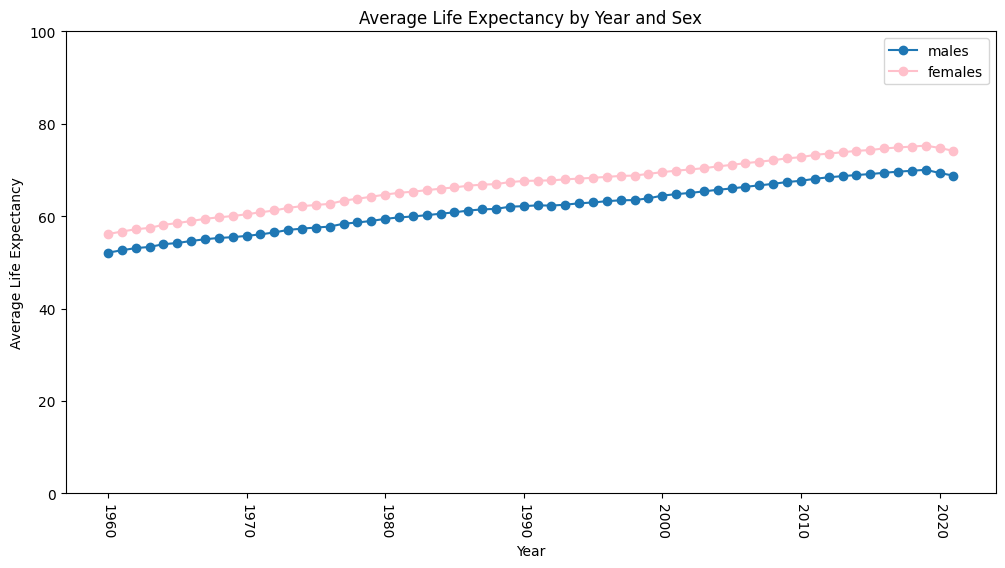

In [17]:
# non-numeric values need to be coerced
Life_Exp_df['Life Expectancy Male'] = pd.to_numeric(Life_Exp_df['Life Expectancy Male'], errors='coerce')
Life_Exp_df['Life Expectancy Female'] = pd.to_numeric(Life_Exp_df['Life Expectancy Female'], errors='coerce')

m_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']
f_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']

# Grouping by 'Year' and 'Status' and calculating average life expectancy
m_grouped_df = m_df.groupby(['Year'])['Life Expectancy Male'].mean().reset_index()
f_grouped_df = f_df.groupby(['Year'])['Life Expectancy Female'].mean().reset_index()

# Creating the line chart
plt.figure(figsize =(12, 6))  

# Line plot for Males
plt.plot(m_grouped_df['Year'], m_grouped_df['Life Expectancy Male'], label='males', marker='o')

# Line plot for Females
plt.plot(f_grouped_df['Year'], f_grouped_df['Life Expectancy Female'], label='females', marker='o', color='pink')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Sex')
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=-90) 

plt.show()

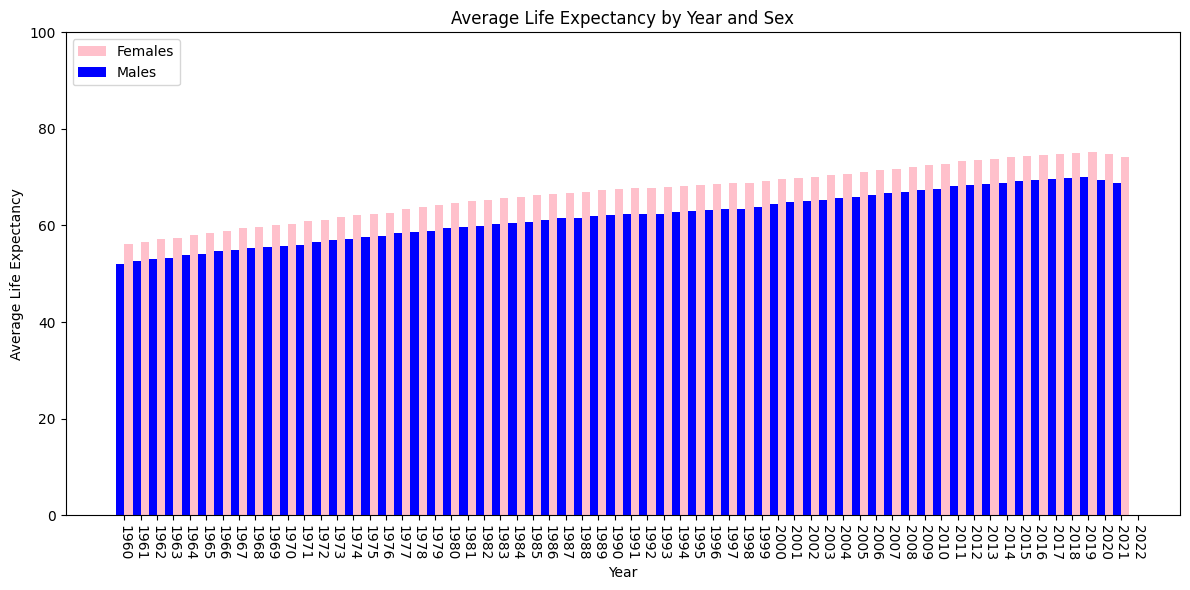

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'Life_Exp_df' is your DataFrame containing the data

# Coerce non-numeric values to NaN
Life_Exp_df['Life Expectancy Male'] = pd.to_numeric(Life_Exp_df['Life Expectancy Male'], errors='coerce')
Life_Exp_df['Life Expectancy Female'] = pd.to_numeric(Life_Exp_df['Life Expectancy Female'], errors='coerce')

# Filter the data for years other than '2022'
filtered_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']

# Calculate average life expectancy for males and females for each year
grouped_df = filtered_df.groupby(['Year']).agg({
    'Life Expectancy Male': 'mean',
    'Life Expectancy Female': 'mean'
}).reset_index()

# Set the width of each bar
bar_width = 0.5

# Calculate the positions of the bars on the x-axis
years = np.arange(len(grouped_df))
bar_positions_male = years
bar_positions_female = years + bar_width

# Create the stacked bar plot
plt.figure(figsize=(12, 6))

plt.bar(bar_positions_female, grouped_df['Life Expectancy Female'], width=bar_width, label='Females', color='pink')
plt.bar(bar_positions_male, grouped_df['Life Expectancy Male'], width=bar_width, label='Males', color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Sex')
plt.ylim(0, 100)
plt.legend()
plt.xticks(bar_positions_male + bar_width / 2, grouped_df['Year'], rotation=-90)

plt.tight_layout()
plt.show()


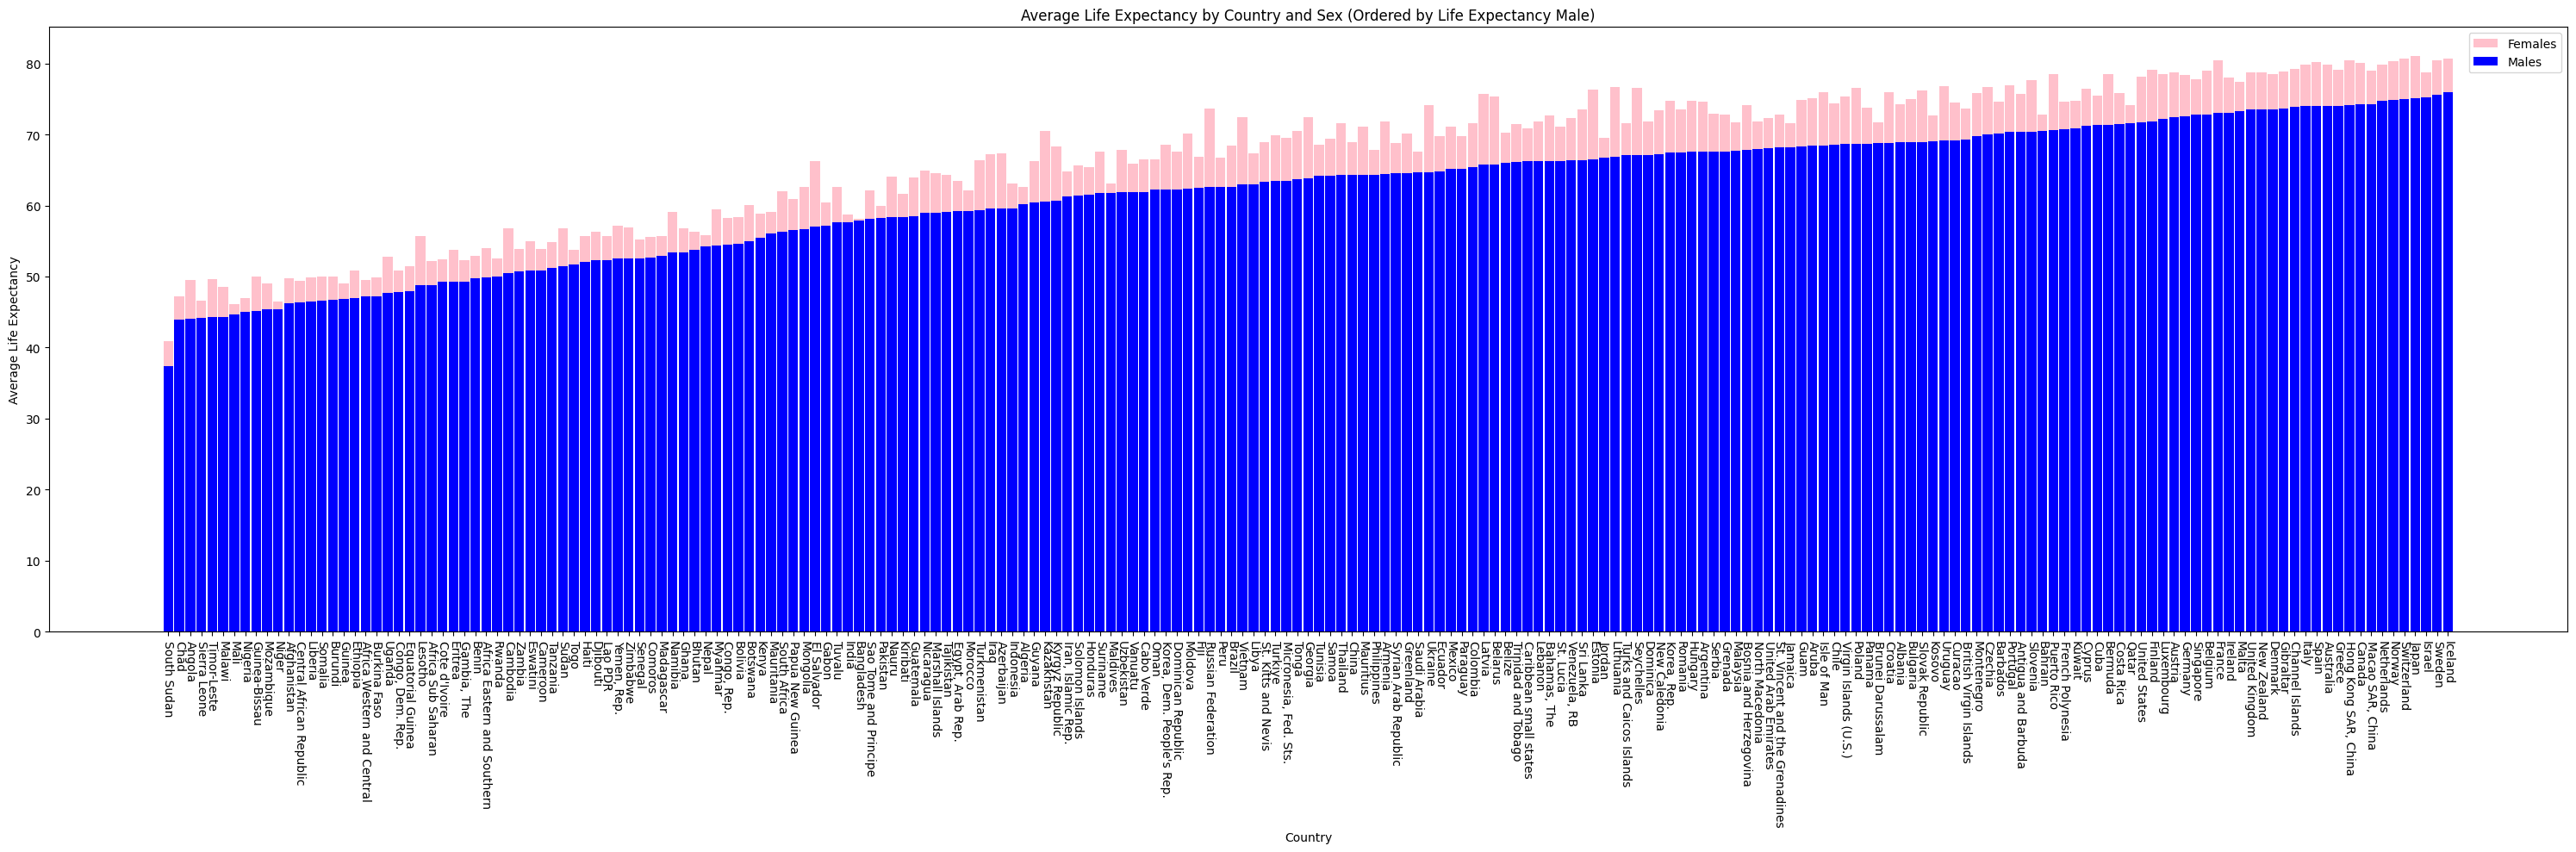

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Coerce non-numeric values to NaN
Life_Exp_df['Life Expectancy Male'] = pd.to_numeric(Life_Exp_df['Life Expectancy Male'], errors='coerce')
Life_Exp_df['Life Expectancy Female'] = pd.to_numeric(Life_Exp_df['Life Expectancy Female'], errors='coerce')

# Filter the data for years other than '2022'
filtered_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']

# Calculate average life expectancy for males and females for each country
grouped_df = filtered_df.groupby(['Country']).agg({
    'Life Expectancy Male': 'mean',
    'Life Expectancy Female': 'mean'
}).reset_index()

# Sort the DataFrame by 'Life Expectancy Male' in ascending order
grouped_df.sort_values(by='Life Expectancy Male', inplace=True)

# Set the width of each bar
bar_width = .9

# Calculate the positions of the bars on the x-axis
countries = np.arange(len(grouped_df))
bar_positions_male = countries
bar_positions_female = countries

# Create the stacked bar plot
plt.figure(figsize=(30, 10))


plt.bar(bar_positions_female, grouped_df['Life Expectancy Female'], width=bar_width, label='Females', color='pink')
plt.bar(bar_positions_male, grouped_df['Life Expectancy Male'], width=bar_width, label='Males', color='blue')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Country and Sex (Ordered by Life Expectancy Male)')

plt.legend()
plt.xticks(bar_positions_male, grouped_df['Country'], rotation=-90)

plt.subplots_adjust(left=0, right=0.3)

plt.tight_layout()
plt.show()


In [20]:
grouped_df['Country'].nunique()

209

## Scatter Plot showing Life Expectancy vs. Population

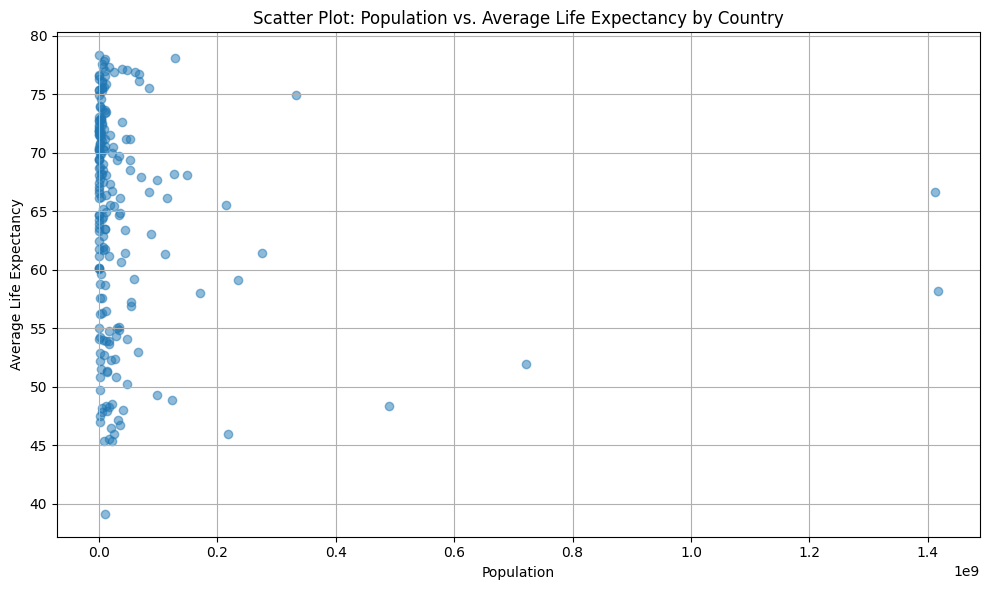

In [21]:
# Convert 'Life Expectancy Male' and 'Life Expectancy Female' columns to numeric, replacing empty strings with NaN
All_Data_df['Life Expectancy Male'] = pd.to_numeric(All_Data_df['Life Expectancy Male'], errors='coerce')
All_Data_df['Life Expectancy Female'] = pd.to_numeric(All_Data_df['Life Expectancy Female'], errors='coerce')

# Calculate the average life expectancy by averaging 'Life Expectancy Male' and 'Life Expectancy Female' columns
All_Data_df['Average Life Expectancy'] = (All_Data_df['Life Expectancy Male'] + All_Data_df['Life Expectancy Female']) / 2

All_Data_df['Population Density'] = (All_Data_df['Square km'] / All_Data_df['Population'])

# Group by 'Country' 
grouped_df = All_Data_df.groupby('Country').agg({
    'Average Life Expectancy': 'mean',
    'Population': 'max'
}).reset_index()

# Remove rows with NaN values (if any) after calculating the average
grouped_df = grouped_df.dropna()

# Reverse the x and y-axis data
x = grouped_df['Population']
y = grouped_df['Average Life Expectancy']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('Population')
plt.ylabel('Average Life Expectancy')
plt.title('Scatter Plot: Population vs. Average Life Expectancy by Country')

plt.grid(True)
plt.tight_layout()

plt.show()




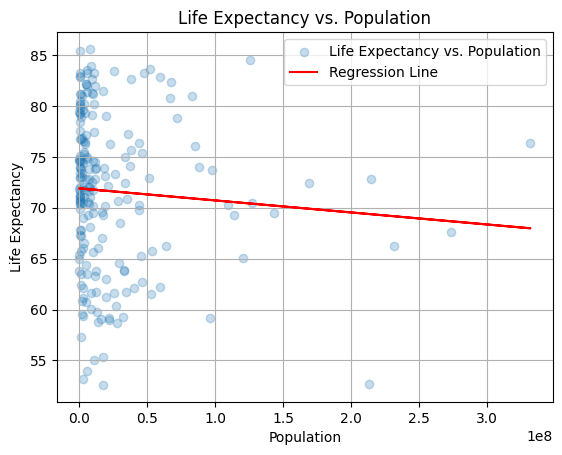

In [22]:
import numpy as np
import matplotlib.pyplot as plt


scatter_data = All_Data_df[(All_Data_df['Year'] == 2021) & (All_Data_df['Population'] < 400000000)].dropna(subset=['Population', 'Life Expectancy Avg'])


x = np.array(scatter_data['Population'])
y = np.array(scatter_data['Life Expectancy Avg'])


# Calculate the regression line using NumPy's polyfit function
coefficients = np.polyfit(x, y, 1)  
regression_line = np.poly1d(coefficients)

# Create the scatter plot
plt.scatter(x, y, alpha=.25, label='Life Expectancy vs. Population')

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')


# Add labels and legend
plt.xlabel('Population')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Population')
plt.legend()
plt.grid()

# Display the plot
plt.show()


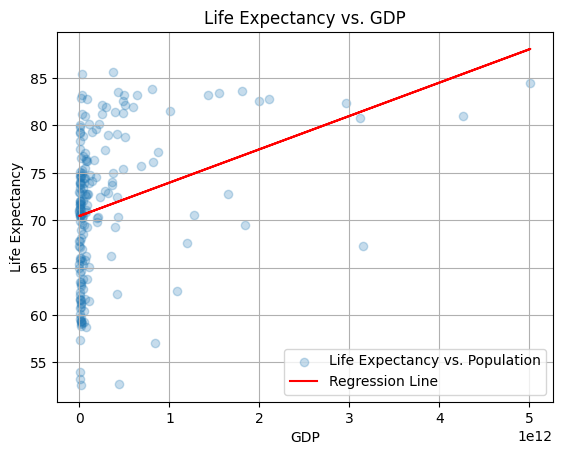

In [23]:
import numpy as np
import matplotlib.pyplot as plt


scatter_data = All_Data_df[(All_Data_df['Year'] == 2021) & (All_Data_df['GDP'] < 10000000000000)]

x = np.array(scatter_data['GDP'])
y = np.array(scatter_data['Life Expectancy Avg'])

# Calculate the regression line using NumPy's polyfit function
coefficients = np.polyfit(x, y, 1)  
regression_line = np.poly1d(coefficients)

# Create the scatter plot
plt.scatter(x, y, alpha=.25, label='Life Expectancy vs. Population')

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. GDP')
plt.legend()
plt.grid()

# Display the plot
plt.show()

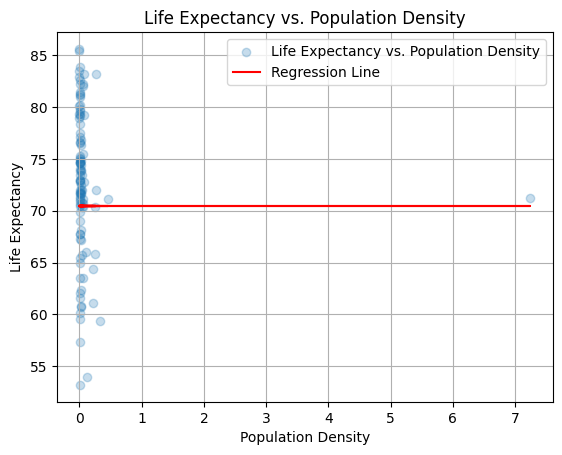

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


scatter_data = All_Data_df[All_Data_df['Year'] == 2021].copy()

# Drop rows with missing values in relevant columns
scatter_data = scatter_data.dropna(subset=["Population", "Life Expectancy Avg", "Country", "GDP"])
scatter_data = scatter_data[(scatter_data['Year'] == 2021) & (scatter_data['Population'] < 10000000)]

scatter_data['Population Density'] = scatter_data['Square km'] / scatter_data['Population']

x = np.array(scatter_data['Population Density'])
y = np.array(scatter_data['Life Expectancy Avg'])

# Calculate the regression line using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create the scatter plot
plt.scatter(x, y, alpha=.25, label='Life Expectancy vs. Population Density')

# Plot the regression line
plt.plot(x, regression_line(x), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('Population Density')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Population Density')
plt.legend()
plt.grid()

# Display the plot
plt.show()

### Bubble Chart showing Life Expectancy by Country

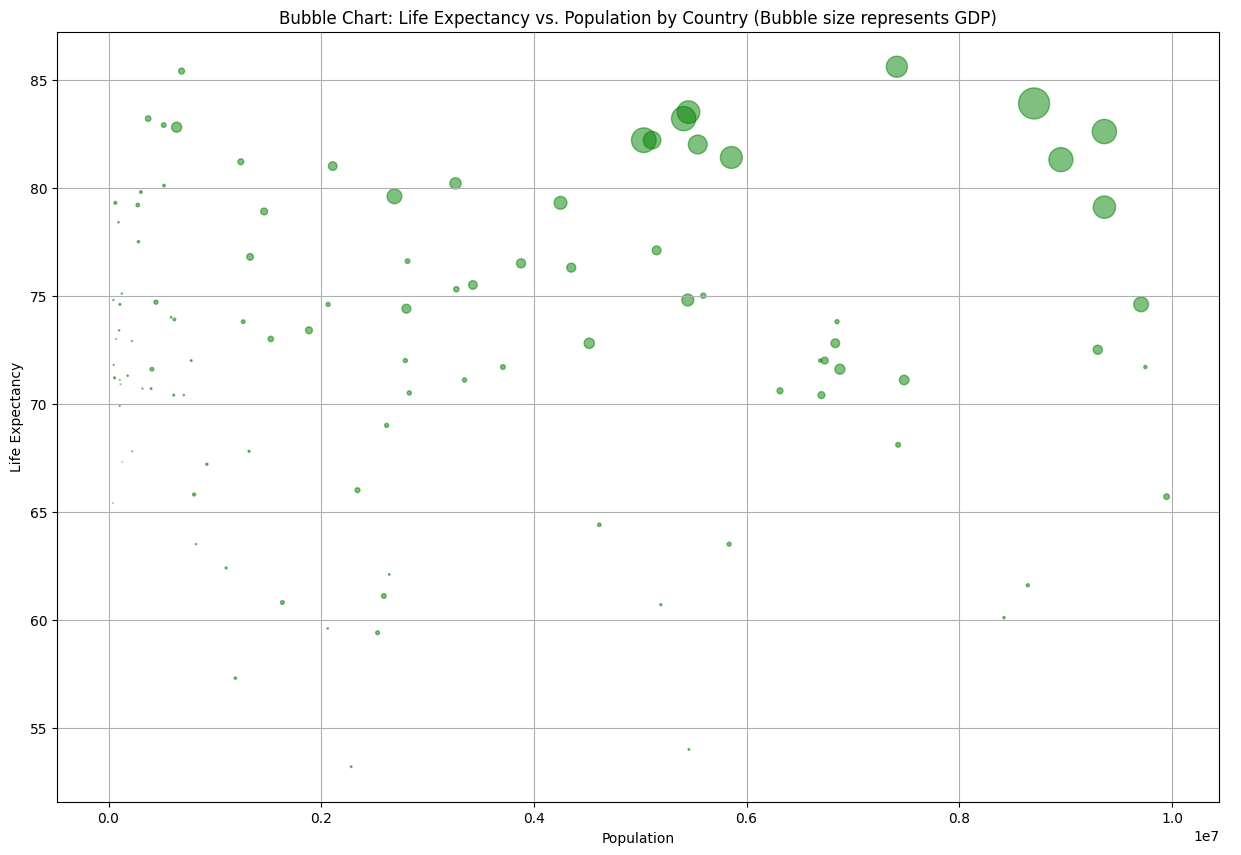

In [25]:
import matplotlib.pyplot as plt

# Drop rows with missing values in relevant columns
Bubble_df = All_Data_df.dropna(subset=["Population", "Life Expectancy Avg", "Country", "GDP"])
Bubble_df = Bubble_df[(Bubble_df['Year'] == 2021) & (Bubble_df['Population'] < 10000000)]

# Group the data by 'Country' and calculate the average values for each country
grouped_data = Bubble_df.groupby('Country').agg({
    'Population': 'mean',
    'Life Expectancy Avg': 'mean',
    'GDP': 'mean'
}).reset_index()

# Extract relevant data columns after dropping NaN values
population = grouped_data["Population"]
life_expectancy = grouped_data["Life Expectancy Avg"]
countries = grouped_data["Country"]
gdp = grouped_data["GDP"]

# Normalize GDP for bubble size (optional - you can choose any other measure as well)
min_gdp = min(gdp)
max_gdp = max(gdp)
normalized_gdp = [(x - min_gdp) / (max_gdp - min_gdp) * 500 for x in gdp]

# Create the bubble chart
plt.figure(figsize=(15, 10))
plt.scatter(population, life_expectancy, s=normalized_gdp, alpha=0.5, color='green')

# Add labels for each bubble (optional)
for i in range(len(countries)):
    plt.annotate(countries[i], (population[i], life_expectancy[i]), ha='center', va='bottom', alpha=.0)

# Set axis labels and title
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.title("Bubble Chart: Life Expectancy vs. Population by Country (Bubble size represents GDP)")
plt.grid()

# Show the plot
plt.show()




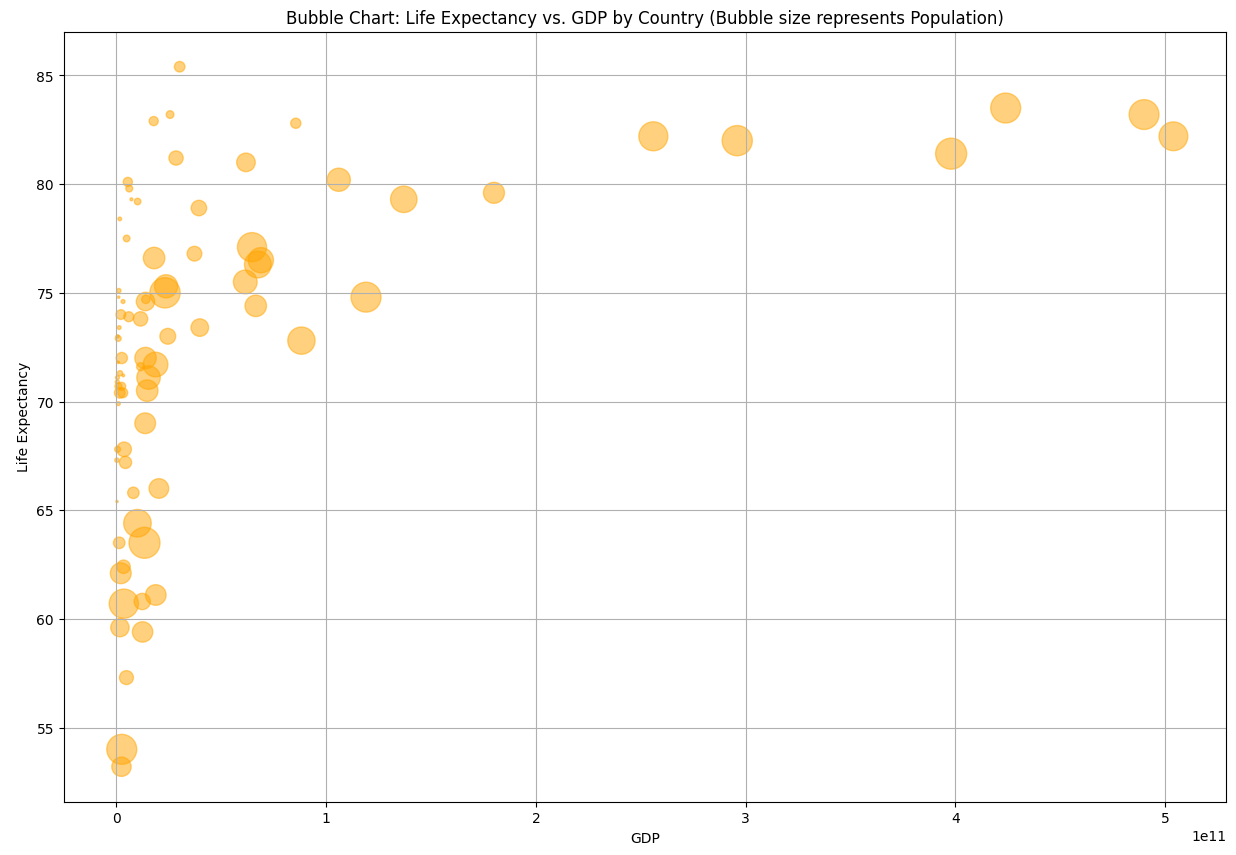

In [26]:
import matplotlib.pyplot as plt

# Drop rows with missing values in relevant columns
Bubble_df = All_Data_df.dropna(subset=["Population", "Life Expectancy Avg", "Country", "GDP"])
Bubble_df = Bubble_df[(Bubble_df['Year'] == 2021) & (Bubble_df['Population'] < 6000000)]

# Group the data by 'Country' and calculate the average values for each country
grouped_data = Bubble_df.groupby('Country').agg({
    'Population': 'mean',
    'Life Expectancy Avg': 'mean',
    'GDP': 'mean'
}).reset_index()

# Extract relevant data columns after dropping NaN values
population = grouped_data["Population"]
life_expectancy = grouped_data["Life Expectancy Avg"]
countries = grouped_data["Country"]
gdp = grouped_data["GDP"]

# Normalize Population for bubble size (optional - you can choose any other measure as well)
min_population = min(population)
max_population = max(population)
normalized_population = [(x - min_population) / (max_population - min_population) * 500 for x in population]

# Create the bubble chart
plt.figure(figsize=(15, 10))
plt.scatter(gdp, life_expectancy, s=normalized_population, alpha=0.5, color='orange')

# Add labels for each bubble (optional)
for i in range(len(countries)):
    plt.annotate(countries[i], (gdp[i], life_expectancy[i]), ha='center', va='bottom', alpha=0)

# Set axis labels and title
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.title("Bubble Chart: Life Expectancy vs. GDP by Country (Bubble size represents Population)")
plt.grid()

# Show the plot
plt.show()


## Box plot comparing distribution of Life Expectancy countries

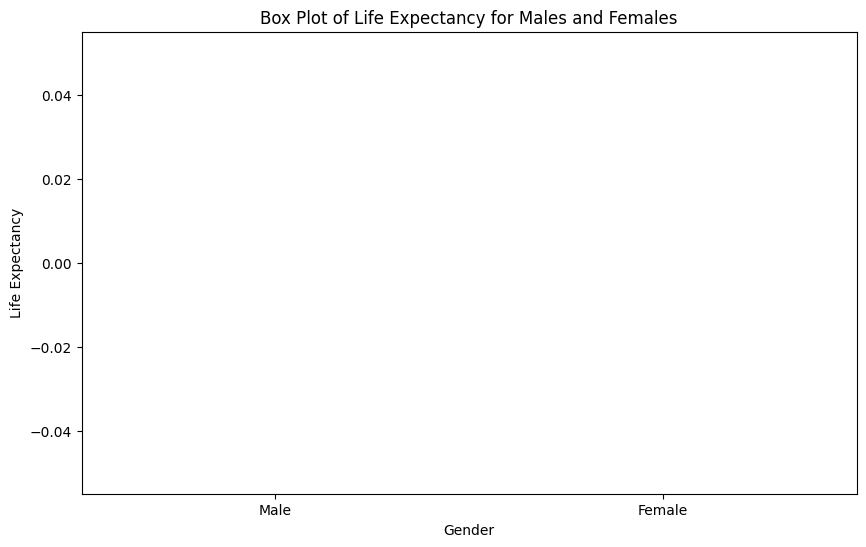

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

mf_life = All_Data_df[All_Data_df['Year'] == 2021]

# Filter out the relevant data for males and females
life_expectancy_male = mf_life['Life Expectancy Male']
life_expectancy_female = mf_life['Life Expectancy Female']

# Combine the data for the box plot
box_plot_data = [life_expectancy_male, life_expectancy_female]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_plot_data, labels=['Male', 'Female'])
plt.title('Box Plot of Life Expectancy for Males and Females')
plt.xlabel('Gender')
plt.ylabel('Life Expectancy')
plt.show()


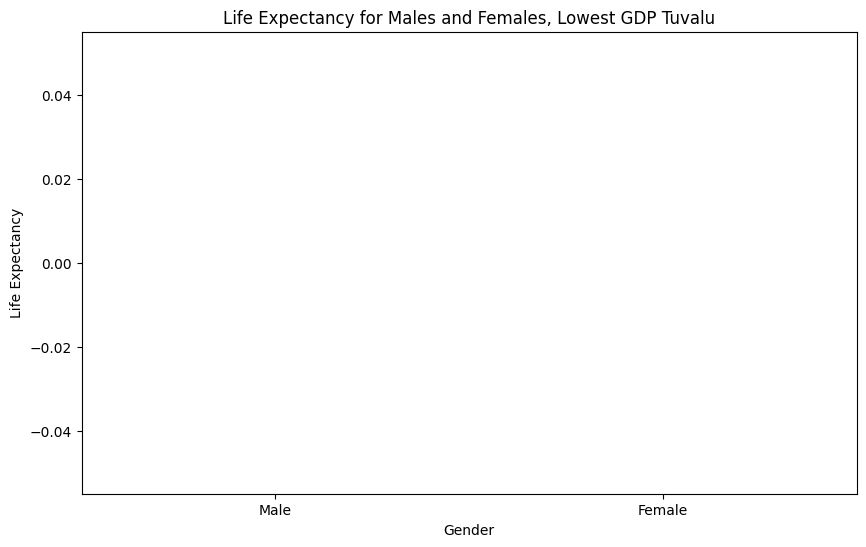

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

mf_life_df = All_Data_df.copy()

# Step 1: Find the country with the lowest GDP
lowest_gdp_country = mf_life_df.loc[mf_life_df['GDP'].idxmin(), 'Country']

# Step 2: Filter the data for the country with the lowest GDP and the year 2021
lowest_gdp_country_data = mf_life_df[(mf_life_df['Country'] == lowest_gdp_country)]

# Step 3: Filter out the relevant data for males and females
life_expectancy_male = lowest_gdp_country_data['Life Expectancy Male']
life_expectancy_female = lowest_gdp_country_data['Life Expectancy Female']

# Combine the data for the box plot
box_plot_data = [life_expectancy_male, life_expectancy_female]


# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_plot_data, labels=['Male', 'Female'])
plt.title(f'Life Expectancy for Males and Females, Lowest GDP {lowest_gdp_country}')
plt.xlabel('Gender')
plt.ylabel('Life Expectancy')
plt.show()


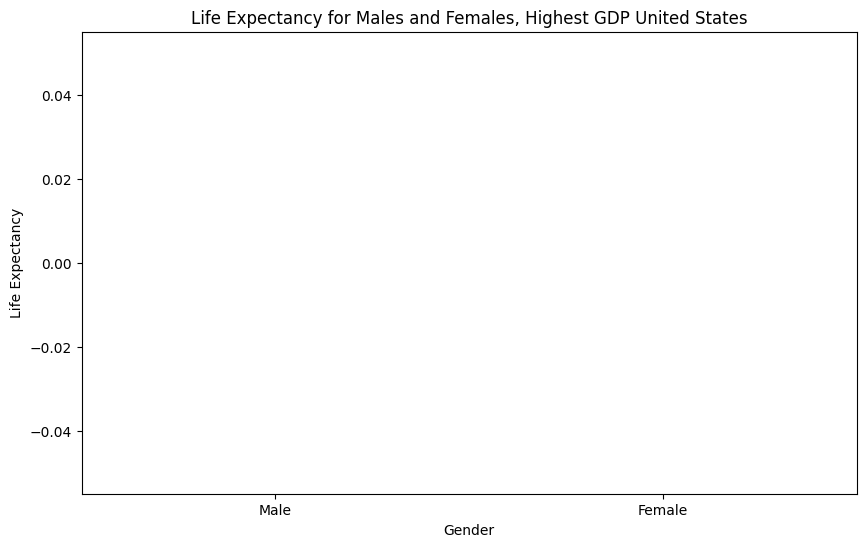

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

mf_life_df = All_Data_df.copy()

# Step 1: Find the country with the lowest GDP
highest_gdp_country = mf_life_df.loc[mf_life_df['GDP'].idxmax(), 'Country']

# Step 2: Filter the data for the country with the lowest GDP and the year 2021
highest_gdp_country_data = mf_life_df[(mf_life_df['Country'] == highest_gdp_country)]

# Step 3: Filter out the relevant data for males and females
life_expectancy_male = highest_gdp_country_data['Life Expectancy Male']
life_expectancy_female = highest_gdp_country_data['Life Expectancy Female']

# Combine the data for the box plot
box_plot_data = [life_expectancy_male, life_expectancy_female]


# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_plot_data, labels=['Male', 'Female'])
plt.title(f'Life Expectancy for Males and Females, Highest GDP {highest_gdp_country}')
plt.xlabel('Gender')
plt.ylabel('Life Expectancy')
plt.show()

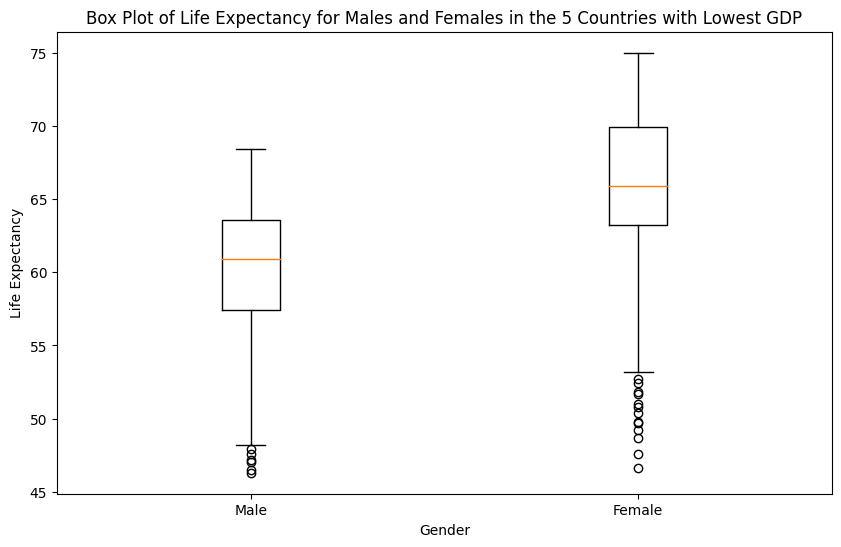

In [54]:
import matplotlib.pyplot as plt


# Step 1: Group by Country and get the maximum GDP for each country
countries_gdp_df = All_Data_df.groupby('Country')['GDP'].max()

# Step 2: Sort the Series by GDP in ascending order
countries_gdp_lowest = countries_gdp_df.sort_values().head(5)

# Step 3: Filter the data for the 5 countries with the lowest GDP 
lowest_gdp_countries_data = All_Data_df[All_Data_df['Country'].isin(countries_gdp_lowest.index)]

# Step 4: Drop rows with NaN values in 'Life Expectancy Male' or 'Life Expectancy Female'
lowest_gdp_countries_data = lowest_gdp_countries_data.dropna(subset=['Life Expectancy Male', 'Life Expectancy Female'])

# Step 5: Filter out the relevant data for males and females
life_expectancy_male = lowest_gdp_countries_data['Life Expectancy Male']
life_expectancy_female = lowest_gdp_countries_data['Life Expectancy Female']

# Combine the data for the box plot
box_plot_data = [life_expectancy_male, life_expectancy_female]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_plot_data, labels=['Male', 'Female'])
plt.title('Box Plot of Life Expectancy for Males and Females in the 5 Countries with Lowest GDP')
plt.xlabel('Gender')
plt.ylabel('Life Expectancy')
plt.show()


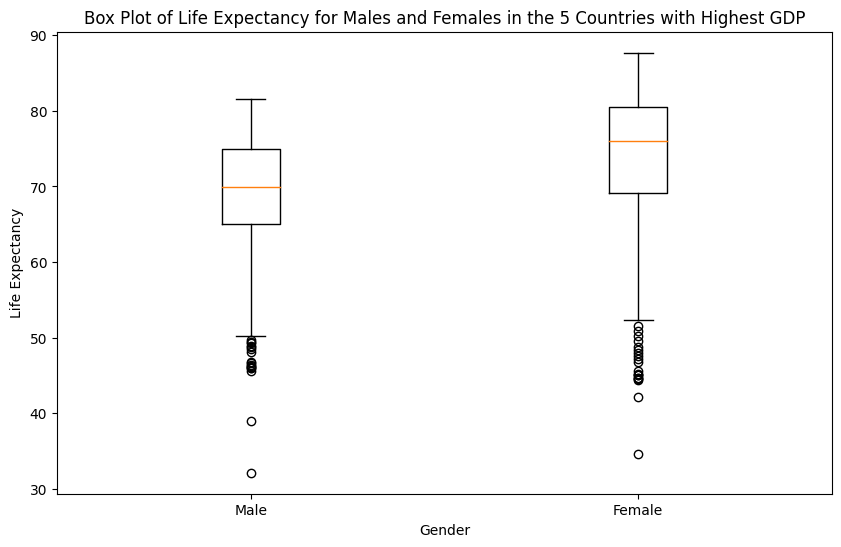

In [55]:
import matplotlib.pyplot as plt

# Step 1: Group by Country and get the maximum GDP for each country
countries_gdp_df = All_Data_df.groupby('Country')['GDP'].max()

# Step 2: Sort the Series by GDP in descending order
countries_gdp_highest = countries_gdp_df.sort_values(ascending=False).head(5)

# Step 3: Filter the data for the 5 countries with the highest GDP
highest_gdp_countries_data = All_Data_df[All_Data_df['Country'].isin(countries_gdp_highest.index)]

# Step 4: Drop rows with NaN values in 'Life Expectancy Male' or 'Life Expectancy Female'
highest_gdp_countries_data = highest_gdp_countries_data.dropna(subset=['Life Expectancy Male', 'Life Expectancy Female'])

# Step 5: Filter out the relevant data for males and females
life_expectancy_male = highest_gdp_countries_data['Life Expectancy Male']
life_expectancy_female = highest_gdp_countries_data['Life Expectancy Female']

# Combine the data for the box plot
box_plot_data = [life_expectancy_male, life_expectancy_female]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(box_plot_data, labels=['Male', 'Female'])
plt.title('Box Plot of Life Expectancy for Males and Females in the 5 Countries with Highest GDP')
plt.xlabel('Gender')
plt.ylabel('Life Expectancy')
plt.show()


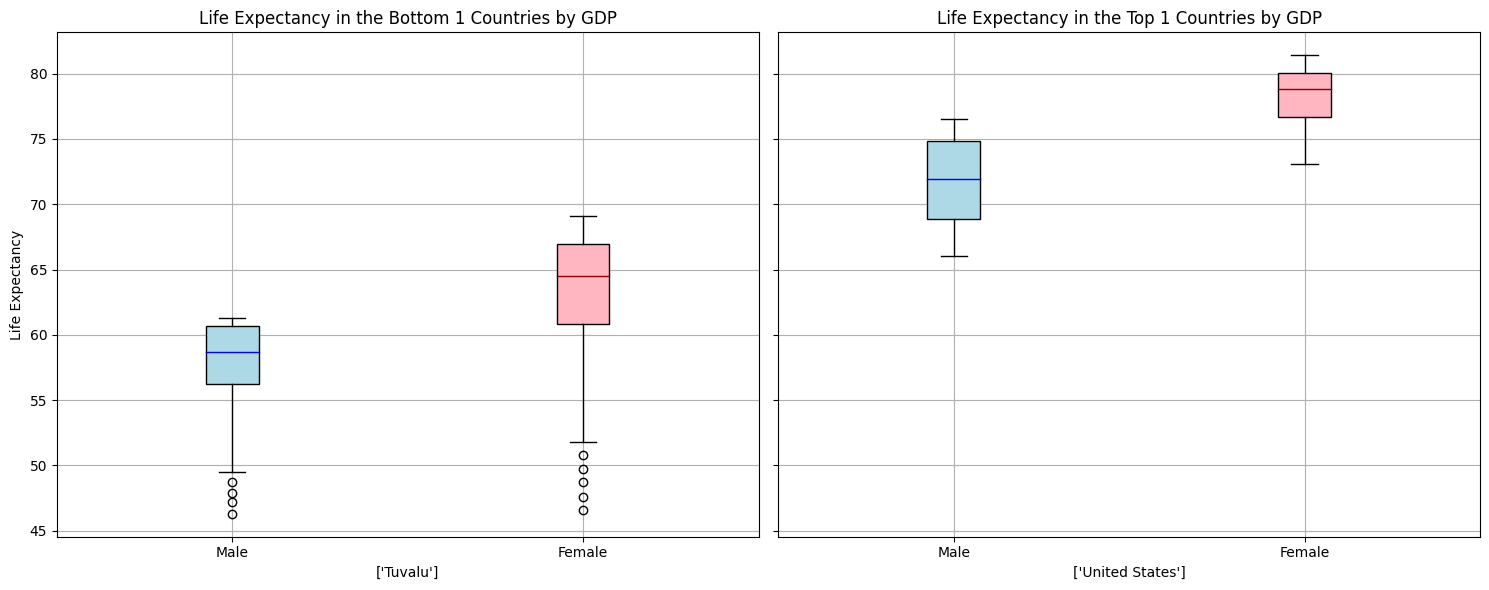

In [103]:
import matplotlib.pyplot as plt

country_ct = 1

# Step 1: Group by Country and get the maximum GDP for each country
countries_gdp_df = All_Data_df.groupby('Country')['GDP'].max()

# Step 2: Sort the Series by GDP in ascending order for the lowest GDP plot
countries_gdp_lowest = countries_gdp_df.sort_values().head(country_ct)
print_lowest = countries_gdp_lowest.index.values

# Step 3: Filter the data for the 5 countries with the lowest GDP 
lowest_gdp_countries_data = All_Data_df[All_Data_df['Country'].isin(countries_gdp_lowest.index)]

# Step 4: Drop rows with NaN values in 'Life Expectancy Male' or 'Life Expectancy Female'
lowest_gdp_countries_data = lowest_gdp_countries_data.dropna(subset=['Life Expectancy Male', 'Life Expectancy Female'])

# Step 5: Filter out the relevant data for males and females
life_expectancy_male_lowest = lowest_gdp_countries_data['Life Expectancy Male']
life_expectancy_female_lowest = lowest_gdp_countries_data['Life Expectancy Female']

# Step 6: Sort the Series by GDP in descending order for the highest GDP plot
countries_gdp_highest = countries_gdp_df.sort_values(ascending=False).head(country_ct)
print_highest = countries_gdp_highest.index.values

# Step 7: Filter the data for the 5 countries with the highest GDP
highest_gdp_countries_data = All_Data_df[All_Data_df['Country'].isin(countries_gdp_highest.index)]

# Step 8: Drop rows with NaN values in 'Life Expectancy Male' or 'Life Expectancy Female'
highest_gdp_countries_data = highest_gdp_countries_data.dropna(subset=['Life Expectancy Male', 'Life Expectancy Female'])

# Step 9: Filter out the relevant data for males and females
life_expectancy_male_highest = highest_gdp_countries_data['Life Expectancy Male']
life_expectancy_female_highest = highest_gdp_countries_data['Life Expectancy Female']

# Combine the data for the box plots
box_plot_data_lowest = [life_expectancy_male_lowest, life_expectancy_female_lowest]
box_plot_data_highest = [life_expectancy_male_highest, life_expectancy_female_highest]

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the box plots for lowest GDP
box_plot_lowest = axs[0].boxplot(box_plot_data_lowest, labels=['Male', 'Female'], patch_artist=True)
axs[0].set_title(f'Life Expectancy in the Bottom {country_ct} Countries by GDP')
axs[0].set_xlabel(f"{print_lowest}")
axs[0].set_ylabel('Life Expectancy')
axs[0].grid()

# Set the box colors for lowest GDP
box_colors_lowest = ['lightblue', 'lightpink']
for box, color in zip(box_plot_lowest['boxes'], box_colors_lowest):
    box.set(facecolor=color)
    box_plot_lowest['medians'][box_colors_lowest.index(color)].set(color='blue' if color == 'lightblue' else 'darkred')

# Plot the box plots for highest GDP
box_plot_highest = axs[1].boxplot(box_plot_data_highest, labels=['Male', 'Female'], patch_artist=True)
axs[1].set_title(f'Life Expectancy in the Top {country_ct} Countries by GDP')
axs[1].set_xlabel(f"{print_highest}")
axs[1].grid()

# Set the box colors for highest GDP
box_colors_highest = ['lightblue', 'lightpink']
for box, color in zip(box_plot_highest['boxes'], box_colors_highest):
    box.set(facecolor=color)
    box_plot_highest['medians'][box_colors_highest.index(color)].set(color='blue' if color == 'lightblue' else 'darkred')

# Show the plots
plt.tight_layout()
plt.show()

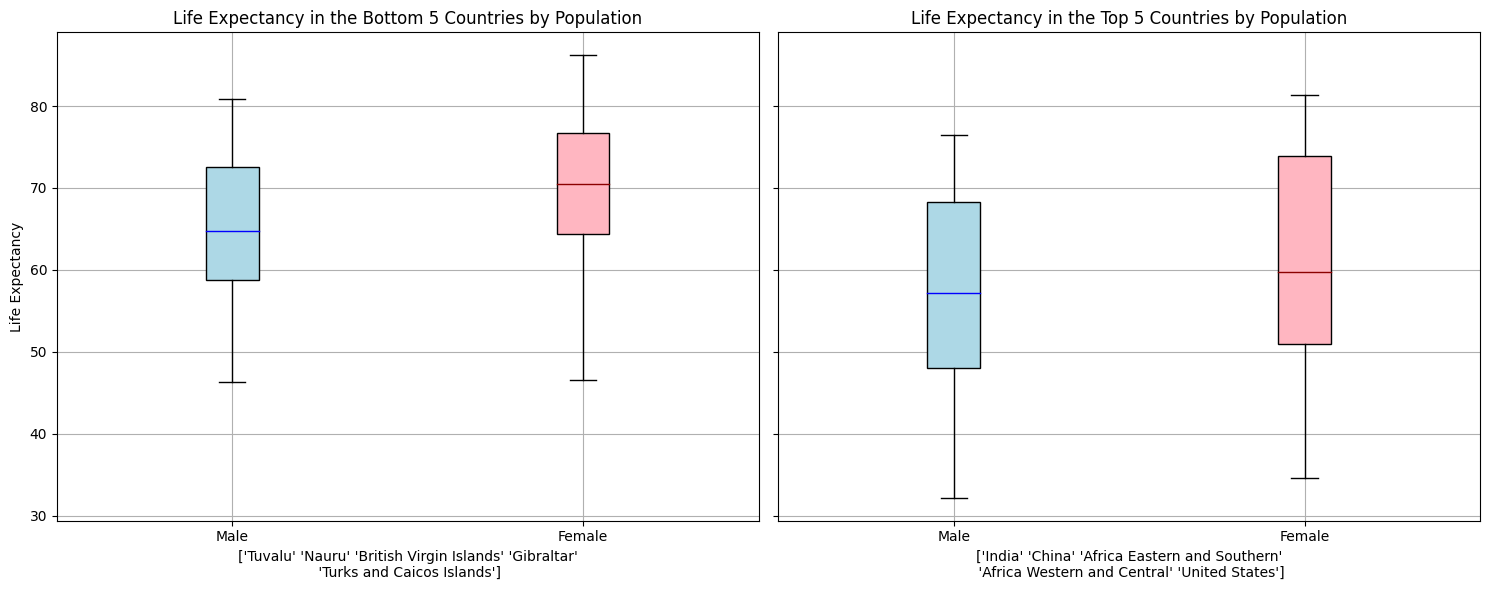

In [111]:
import matplotlib.pyplot as plt

country_ct = 5

# Step 1: Group by Country and get the maximum Population for each country
countries_population_df = All_Data_df.groupby('Country')['Population'].max()

# Step 2: Sort the Series by Population in ascending order for the lowest Population plot
countries_population_lowest = countries_population_df.sort_values().head(country_ct)
print_lowest = countries_population_lowest.index.values
# Step 3: Filter the data for the 5 countries with the lowest Population
lowest_population_countries_data = All_Data_df[All_Data_df['Country'].isin(countries_population_lowest.index)]

# Step 4: Drop rows with NaN values in 'Life Expectancy Male' or 'Life Expectancy Female'
lowest_population_countries_data = lowest_population_countries_data.dropna(subset=['Life Expectancy Male', 'Life Expectancy Female'])

# Step 5: Filter out the relevant data for males and females
life_expectancy_male_lowest = lowest_population_countries_data['Life Expectancy Male']
life_expectancy_female_lowest = lowest_population_countries_data['Life Expectancy Female']

# Step 6: Sort the Series by Population in descending order for the highest Population plot
countries_population_highest = countries_population_df.sort_values(ascending=False).head(country_ct)
print_highest = countries_population_highest.index.values

# Step 7: Filter the data for the 5 countries with the highest Population
highest_population_countries_data = All_Data_df[All_Data_df['Country'].isin(countries_population_highest.index)]

# Step 8: Drop rows with NaN values in 'Life Expectancy Male' or 'Life Expectancy Female'
highest_population_countries_data = highest_population_countries_data.dropna(subset=['Life Expectancy Male', 'Life Expectancy Female'])

# Step 9: Filter out the relevant data for males and females
life_expectancy_male_highest = highest_population_countries_data['Life Expectancy Male']
life_expectancy_female_highest = highest_population_countries_data['Life Expectancy Female']

# Combine the data for the box plots
box_plot_data_lowest = [life_expectancy_male_lowest, life_expectancy_female_lowest]
box_plot_data_highest = [life_expectancy_male_highest, life_expectancy_female_highest]

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the box plots for lowest Population
box_plot_lowest = axs[0].boxplot(box_plot_data_lowest, labels=['Male', 'Female'], patch_artist=True)
axs[0].set_title(f'Life Expectancy in the Bottom {country_ct} Countries by Population')
axs[0].set_xlabel(f'{print_lowest}')
axs[0].set_ylabel('Life Expectancy')
axs[0].grid()

# Set the box colors for lowest Population
box_colors_lowest = ['lightblue', 'lightpink']
for box, color in zip(box_plot_lowest['boxes'], box_colors_lowest):
    box.set(facecolor=color)
    box_plot_lowest['medians'][box_colors_lowest.index(color)].set(color='blue' if color == 'lightblue' else 'darkred')

# Plot the box plots for highest Population
box_plot_highest = axs[1].boxplot(box_plot_data_highest, labels=['Male', 'Female'], patch_artist=True)
axs[1].set_title(f'Life Expectancy in the Top {country_ct} Countries by Population')
axs[1].set_xlabel(f'{print_highest}')
axs[1].grid()

# Set the box colors for highest Population
box_colors_highest = ['lightblue', 'lightpink']
for box, color in zip(box_plot_highest['boxes'], box_colors_highest):
    box.set(facecolor=color)
    box_plot_highest['medians'][box_colors_highest.index(color)].set(color='blue' if color == 'lightblue' else 'darkred')

# Show the plots
plt.tight_layout()
plt.show()
